In [37]:
import pandas as pd
import numpy as np
import random
import os
import sys
import matplotlib.pyplot as  plt
import seaborn as sns

df = pd.read_csv("weather.csv")
df


,ID,Weather,Temp,Humidity,Windy,Play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,70,96,False,yes
4,5,rainy,68,80,False,yes
5,6,rainy,65,70,True,no
6,7,overcast,64,65,True,yes
7,8,sunny,72,95,False,no
8,9,sunny,69,70,False,yes
9,10,rainy,75,80,False,yes


In [38]:
import pandas as pd, numpy as np, matplotlib as plt, seaborn as sns

df.drop("ID", axis=1)

#atributos binários
dic = {"play": {"yes": 1, "no": 0}, "windy": {True:1, False:0}}
df["Play"] = df["Play"].map(dic["play"])
df["Windy"] = df["Windy"].map(dic["windy"])

#Weather
weather_dict = {'rainy': 0, 'overcast': 1, 'sunny': 2}
df['Weather'] = df['Weather'].map(weather_dict)



weather1 = df
#falta acabar para variaveis continuas
print(weather1[["Humidity", "Play"]].corr())
sns.histplot(weather1[["Humidity"]], binrange=)

SyntaxError: invalid syntax (2825495179.py, line 19)

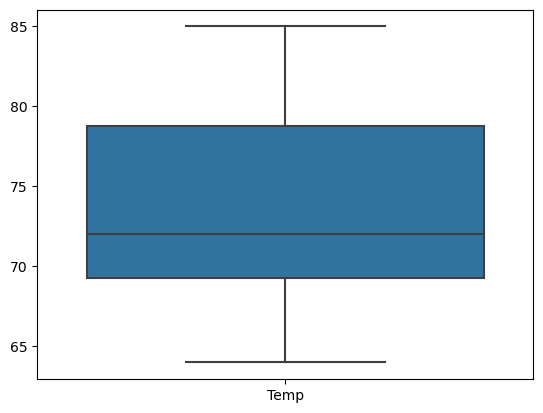

In [ ]:
plot = sns.boxplot(df[['Temp']])

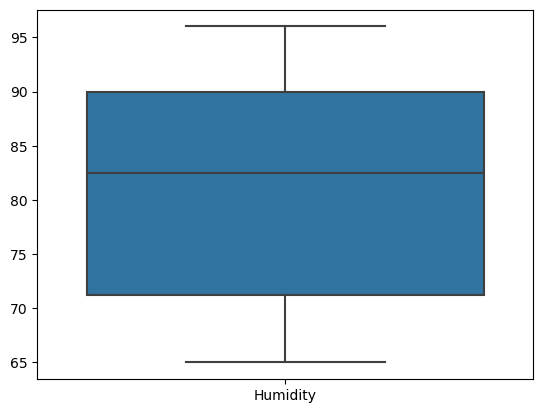

In [ ]:
plot = sns.boxplot(df[['Humidity']])

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.preprocessing import KBinsDiscretizer  
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
Xt = est.fit_transform(df[['Temp', 'Play']]) 
Xt

array([[2., 0.],
       [2., 0.],
       [2., 2.],
       [0., 2.],
       [0., 2.],
       [0., 0.],
       [0., 2.],
       [1., 0.],
       [0., 2.],
       [1., 2.],
       [1., 2.],
       [1., 2.],
       [2., 2.],
       [1., 0.]])

In [ ]:
import pandas as pd, numpy as np, matplotlib as plt, seaborn as sns

weather_df = pd.read_csv('weather.csv')

weather_df = weather_df.drop('ID', axis=1)

#atributos binários
dic = {"play": {"yes": 1, "no": 0}, "windy": {True:1, False:0}}
weather_df["Play"] = weather_df["Play"].map(dic["play"])
weather_df["Windy"] = weather_df["Windy"].map(dic["windy"])

#Weather
weather_dict = {'rainy': 0, 'overcast': 1, 'sunny': 2}
weather_df['Weather'] = weather_df['Weather'].map(weather_dict)

 
weather_df['Humidity'] = pd.cut(weather_df['Humidity'], bins=[60, 83, 100], labels=[0,1] )
# no weather.ipynb fiz a avaliação dos quartis Temp e humidity para a seleção dos bins 
# se lê bins=[50, 67, 74, 79, 100] primeiro intervalo de 50 a 67, segundo 67 a 74 ..., o numero de labels precisam ser len(bins) - 1


In [ ]:
import pandas as pd
import numpy as np

def entropy(a) -> float:
    # Handle potential empty DataFrames or attributes with no unique values
    if len(a) == 0 or len(a.unique()) == 1:
        return 0  # Entropy is 0 for empty datasets or single-valued attributes

    # Vectorized implementation for efficiency using `groupby` and weighted entropy calculation
    value_counts = a.value_counts(normalize=True)
    entropy = -(value_counts * np.log2(value_counts)).sum()

    return entropy

def best_point_split(df, attribute):
    acc = []
    b = df[attribute]
    for i in range(49):
        a = pd.cut(b, bins=[50, 51 + i, 100], labels=[0,1])
        ent = entropy(a)
        if ent == 0:
            acc.append(1)
        else:
            acc.append(ent)
    minimo = min(acc)
    return (minimo,acc.index(minimo))





c:\Users\35193\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\35193\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\35193\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\35193\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

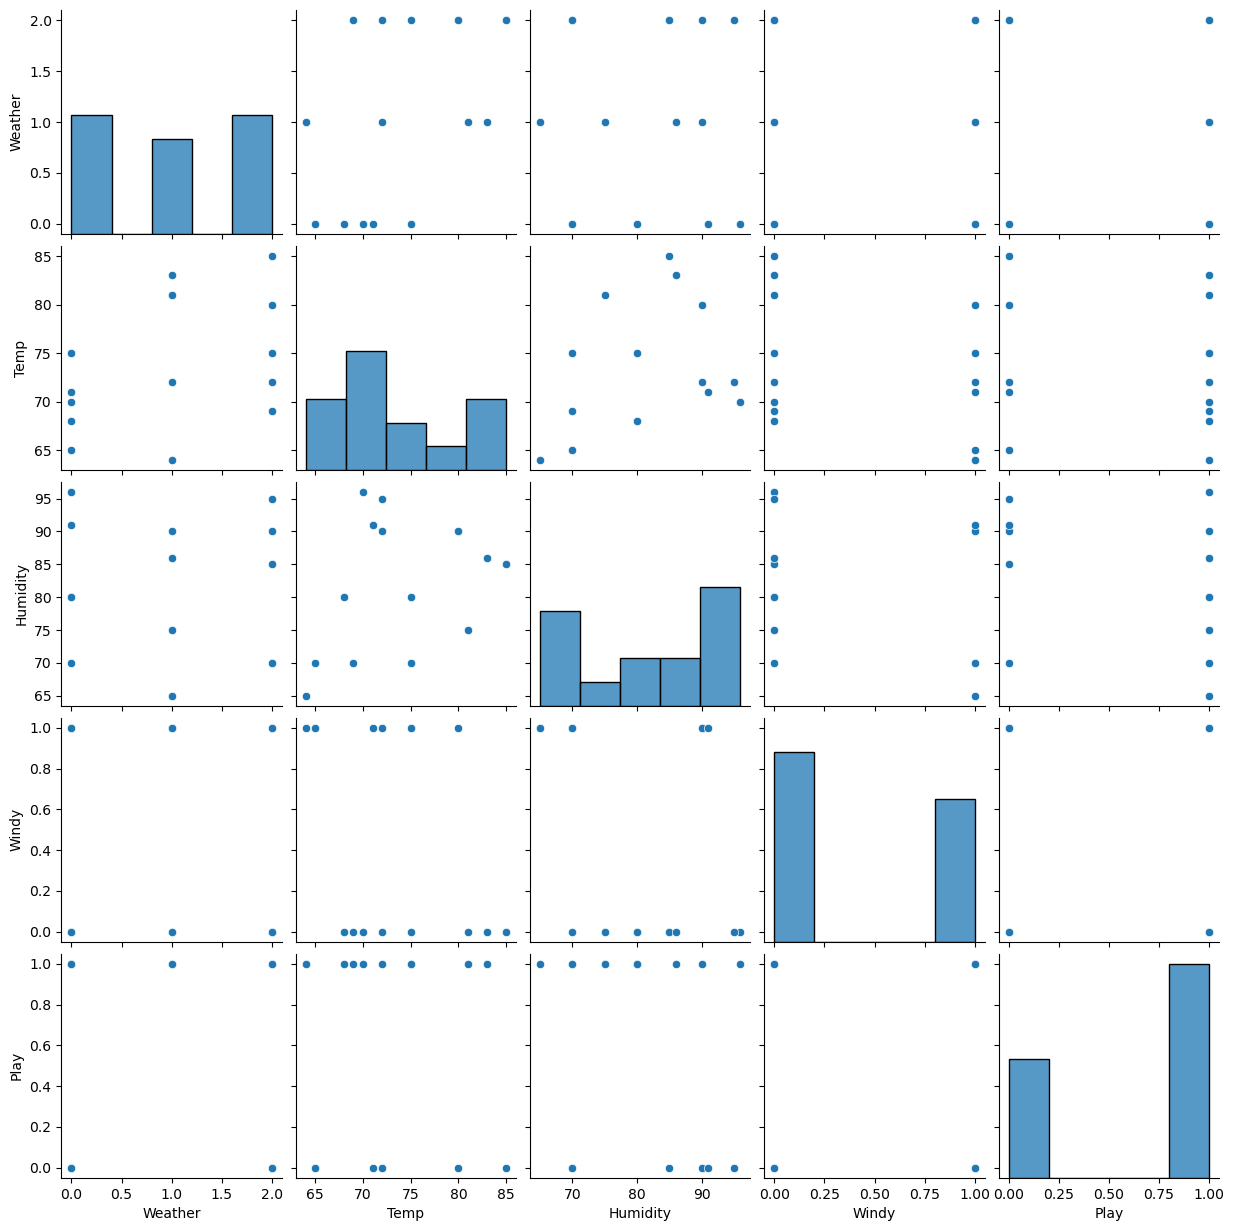

In [ ]:
import seaborn as sns

df = df.set_index('ID')
sns.pairplot(df)

In [ ]:
weather_mapping = {'sunny': 'Sunny', 'rain': 'Rain', 'overcast': 'Overcast'}
# Create new DataFrame with separate weather columns
df_new = df["Weather"].str.get_dummies()
#df = pd.concat([df, df_new], axis=1)

df_new

AttributeError: Can only use .str accessor with string values!

In [ ]:
dic = {"play": {"yes": 1, "no": 0}, "windy": {True:1, False:0}}
df.set_index('ID')
new = df
new["Play"] = df["Play"].replace(dic["play"])
new["Windy"] = df["Windy"].replace(dic["windy"])

KeyError: "None of ['ID'] are in the columns"

In [ ]:
final = pd.concat([new, df_new], axis=1)
final.drop('Weather', axis=1, inplace=True)
final

,ID,Temp,Humidity,Windy,Play,overcast,rainy,sunny
0,1,85,85,0,0,0,0,1
1,2,80,90,1,0,0,0,1
2,3,83,86,0,1,1,0,0
3,4,70,96,0,1,0,1,0
4,5,68,80,0,1,0,1,0
5,6,65,70,1,0,0,1,0
6,7,64,65,1,1,1,0,0
7,8,72,95,0,0,0,0,1
8,9,69,70,0,1,0,0,1
9,10,75,80,0,1,0,1,0


In [ ]:
df.columns

Index(['ID', 'Weather', 'Temp', 'Humidity', 'Windy', 'Play'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        14 non-null     int64 
 1   Weather   14 non-null     object
 2   Temp      14 non-null     int64 
 3   Humidity  14 non-null     int64 
 4   Windy     14 non-null     int64 
 5   Play      14 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 804.0+ bytes


In [ ]:
df.describe()

,ID,Temp,Humidity,Windy,Play
count,14.0000,14.000000,14.000000,14.000000,14.000000
mean,7.5000,73.571429,81.642857,0.428571,0.642857
std,4.1833,6.571667,10.285218,0.513553,0.497245
min,1.0000,64.000000,65.000000,0.000000,0.000000
25%,4.2500,69.250000,71.250000,0.000000,0.000000
50%,7.5000,72.000000,82.500000,0.000000,1.000000
75%,10.7500,78.750000,90.000000,1.000000,1.000000
max,14.0000,85.000000,96.000000,1.000000,1.000000


In [ ]:
possibleWeather = {cap for cap in df["Weather"]}
possibleWeather


{'overcast', 'rainy', 'sunny'}

In [ ]:
final.columns

Index(['ID', 'Temp', 'Humidity', 'Windy', 'Play', 'overcast', 'rainy',
       'sunny'],
      dtype='object')

In [ ]:
final.Play.values

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
final = final.reindex(['ID', 'Temp', 'Humidity', 'Windy', 'overcast', 'rainy', 'sunny',  'Play'], axis=1)
final

,ID,Temp,Humidity,Windy,overcast,rainy,sunny,Play
0,1,85,85,0,0,0,1,0
1,2,80,90,1,0,0,1,0
2,3,83,86,0,1,0,0,1
3,4,70,96,0,0,1,0,1
4,5,68,80,0,0,1,0,1
5,6,65,70,1,0,1,0,0
6,7,64,65,1,1,0,0,1
7,8,72,95,0,0,0,1,0
8,9,69,70,0,0,0,1,1
9,10,75,80,0,0,1,0,1


c:\Users\35193\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


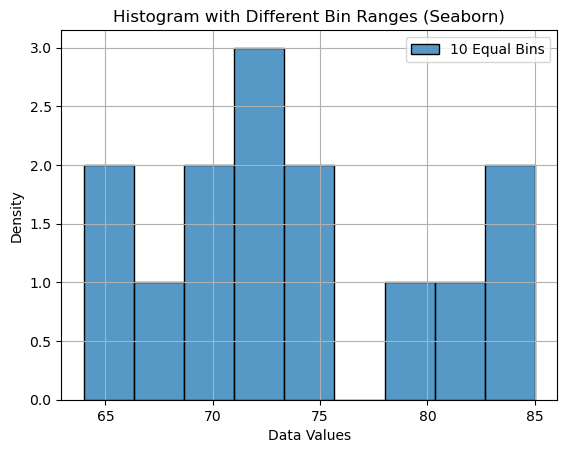

In [40]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = weather1['Temp']

# Define different bin ranges (similar to matplotlib)
bin_range1 = np.linspace(min(data), max(data), 10)
#bin_range2 = data

# Create histograms with different bin ranges using seaborn
sns.histplot(data, bins=bin_range1, label='10 Equal Bins')
#sns.histplot(data, bins=bin_range2, label='Custom Bins', alpha=0.7)

# Customize the plot using seaborn functions
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.title('Histogram with Different Bin Ranges (Seaborn)')
plt.legend()
plt.grid(True)
plt.show()
